In [24]:
### From Burgess et al 2007
### 1-D : oscillatory interference

In [25]:
### Import necessary modules
from numpy import *
from scipy import *
from pylab import *
from math import *

%matplotlib inline

### Setting up the model parameters

In [26]:
#### Model Parameters
beta = 0.01*2*pi            #Spatial scaling factor (in rad/cm)
s = 30                      #Running speed (in cm/s)
phase = 0                   #Preferred running direction (in rad)
ws = 10                     #Somatic intrinsic frequency (in Hz)
wd = ws + beta*s            #Dendritic frequency (in Hz)
phid = 0                    #Dendritic phase
env_per = 0.5/(wd - ws)     #Envelope time period = 1/freq


## Environment size
bsize = 78*2                #Box edge length (in cm)
tsize = bsize/s             #In second
dt = 0.002                  #In sec
dx = dt*s

## Simulation parameters
t = arange(0,tsize, dt)     #Time (in s)
thresh = 1.15               #Threshold (between -2  and 2: as amplitudes ) for firing




### Setting the dendritic and somatic oscillators

In [27]:
#Theta oscillator: same as soma
int_fr = [cos(ws*2*pi*tm) - 3 for tm in t]

### V_somatic + v_dendritic
fr = [ (cos(ws*2*pi*tm) + cos(wd*2*pi*tm + phid) ) for tm in t]

#Theta phase
phase = [mod(ws*2*pi*tm+pi, 2*pi) for tm in t]

### Parameters for generating spikes

In [28]:
#refractory period (in s) = 2.1 ms (no point making it <= dt)
tref = 0.0021

#No. of trials with same grid
trials = 1000

#Spikes: binary matrix: 1 for spike. 0 for no spike. For all trials
spikes = array([ [0 for tm in t] for ii in range(trials)])

#(refractory period - time since last spike)
tsls = array([0.005 for ii in range(trials)])
tsls = reshape(tsls,trials,1)

### Generate spikes for all trials

In [29]:
for tm in xrange(0,len(t)):
    rand_throw = rand(trials)
    ## Here we use proportional firing probability with threshold.
    ## Can use an indicator function instead. Does psth look different?
    fprob = (fr[tm] - thresh)/(2.0-thresh)
    
    # Generate spikes with given prob and after refractory period.
    spikes[:,tm] = multiply((rand_throw <= fprob),(tsls <= 0))*1
    
    # Reset/decrease tsls
    # tsls is reset to tref if cell spikes at instant tm. Else it decreases by dt.
    tsls = tref*(rand_throw <= fprob)*1 -dt* (rand_throw > fprob)*1


## Visualising activity patterns

In [30]:
#Peri-stimulus histogram
psth = sum(spikes, axis=0)
MFR = max(psth)           # Max firing rate(no. of spikes) at a given instant

#Example spiketimes indices for 1st and last trial
spt1 = (spikes[0,:])
spt1 = where(spt1==1)
spt2 = (spikes[trials-1,:])
spt2 = where(spt2==1)


### Calculating spike phases

In [31]:
dtheta = 5*2*pi/180

phase_psth = arange(0,2*pi,dtheta)
for ii in t:
    p = int(mod(ws*2*pi*tm+pi, 2*pi)/dtheta)
    phase_psth[p] += psth[ii]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Plotting

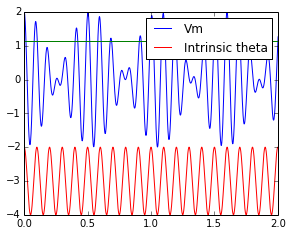

In [36]:
fig1=figure(figsize=(10,8))

###########
###### Grid pattern in time for speed s:
###########
subplot(221)
#Total somatic V
plot(t,fr)
#Theta oscillator
plot(t, int_fr, 'r')
#Threshold for firing
plot(t, [thresh for tm in t], 'g')
xlim([0, tsize/2])
legend(('Vm','Intrinsic theta'))



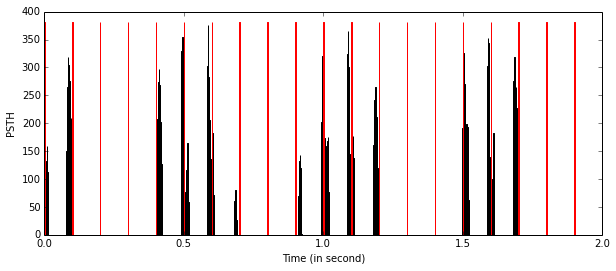

In [37]:
###### PSTH
fig2=figure(figsize=(10,4))
bar(t,psth, width=dt)
bar([1.0*n/ws for n in xrange(0, int(tsize*ws)+1)], [MFR+5 for n in xrange(0, int(tsize*ws)+1)], color='r', width=dt, edgecolor='r')
xlim([0, tsize/2])
ylabel('PSTH')

xlabel('Time (in second)')
